In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
train = pd.read_excel("diabetes_data.xlsx")

In [141]:
label_encoder = LabelEncoder().fit(train.Label)
labels = label_encoder.transform(train.Label)
classes = list(label_encoder.classes_)

In [142]:
train = train.drop(["Label"],axis=1)

In [143]:
train.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
515,39,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
516,48,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
517,58,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
518,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
nb_features = 16
nb_classes = len(classes)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train.values)
train = scaler.transform(train.values)

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.3)

In [147]:
y_valid.shape
y_train.shape

(364,)

In [148]:
x_train = np.array(x_train).reshape(364, 16)#X_train.shape
x_valid = np.array(x_valid).reshape(156, 16)

In [149]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
model1=lr.fit(x_train, y_train)

In [150]:
print("Train accuracy:",model1.score(x_train, y_train))

Train accuracy: 0.8681318681318682


In [151]:
print("Test accuracy:",model1.score(x_valid,y_valid))

Test accuracy: 0.8782051282051282


In [164]:
lrpred = lr.predict(x_valid)

In [161]:
cm = confusion_matrix(y_valid, lrpred)

In [162]:
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

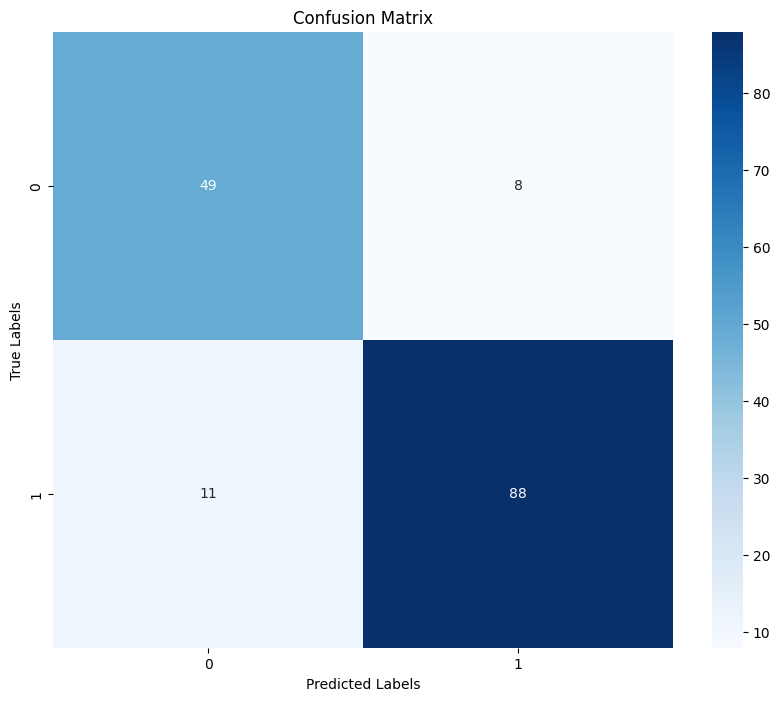

In [163]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()